# Математическая статистика
## Практическое задание 1

В данном задании рассматриваются различные способы генерации выборки из некоторых стандартных распределений, а так же рассматриваются некоторые свойства эмпирической функции распределения и ядерной оценки плотности.

**Правила:**

* Баллы за каждую задачу указаны далее. Если сумма баллов за задание меньше 25%, то все задание оценивается в 0 баллов.
* Выполненную работу нужно отправить на почту `probability.diht@yandex.ru`, указав тему письма `"[номер группы] Фамилия Имя - Задание 1"`. Квадратные скобки обязательны.
* Прислать нужно ноутбук и его pdf-версию. Названия файлов должны быть такими: `1.N.ipynb` и `1.N.pdf`, где `N` - ваш номер из таблицы с оценками.
* Никакой код из данного задания при проверке запускаться не будет.

**Баллы за задание:**

* Задача 1 - 13 баллов
* Задача 2 - 3 балла
* Задача 3 - 5 баллов
* Задача 4 - 3 балла
* Задача 5 - 2 балла
* Задача 6 - 1 балл
* Задача 7 - 3 балла

In [5]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt

%matplotlib inline

**Задача 1.** Имеется симметричная монета. С ее помощью напишите функцию генерации выборки из многомерного нормального распределения с заданными параметрами.

*Часть 1.* Напишите сначала функцию генерации равномерного распределения на отрезке $[0, 1]$ с заданной точностью. Это можно сделать, записав случайную величину $\xi \sim U[0, 1]$ в двоичной системе системе счисления $\xi = 0,\xi_1\xi_2\xi_3...$. Тогда $\xi_i \sim Bern(1/2)$ и независимы в совокупности. Приближение заключается в том, что вместо генерации бесконечного количества $\xi_i$ мы полагаем $\xi = 0,\xi_1\xi_2\xi_3...\xi_n$.

Для получения максимального балла реализовать функцию нужно так, чтобы она могла принимать на вход в качестве параметра `size` объект `tuple` любой размерности, и возвращать объект `numpy.array` соответствующей размерности. Например, если `size=(10, 1, 5)`, то функция должна вернуть объект размера $10 \times 1 \times 5$. Кроме того, функцию `coin` можно вызвать только один раз, и, конечно же, не использовать какие-либо циклы.

In [49]:
coin = sps.bernoulli(0.5).rvs  # симметричная монета
# coin(size=10) --- реализация 10 бросков монеты

def uniform(size=1, precision=30):
    sample = np.array(np.split(coin(np.array(size).prod() * precision), np.array(size).prod()))  # подбрасывания
    powers = np.array(np.split(np.tile((np.ones(precision) * 2) ** (-(np.arange(0, precision) + 1)),
                                       np.array(size).prod()), np.array(size).prod()))  # степени двойки
    sample = sample * powers 
    return np.reshape(sample.sum(axis=1), size)

Для $U[0, 1]$ сгенерируйте выборку и постройте график плотности.

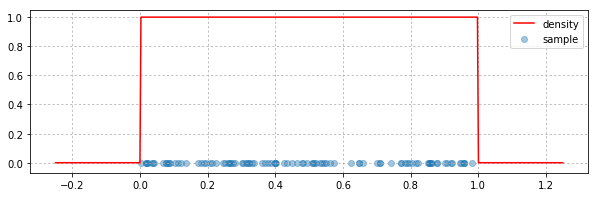

In [50]:
size = 100
grid = np.linspace(-0.25, 1.25, 500)

plt.figure(figsize=(10, 3))
plt.scatter(#<Сгенерируйте выборку размера size точности 50>,
            uniform(size, 50),
            np.zeros(size), alpha=0.4, label='sample')
plt.plot(grid,
         #<Посчитайте плотность в точках grid, используя sps.uniform.pdf>,
         sps.uniform.pdf(grid),
         color='red', label='density')
plt.legend()
plt.grid(ls=':')
plt.show()

Исследуйте, как меняется выборка в зависимости от precision.

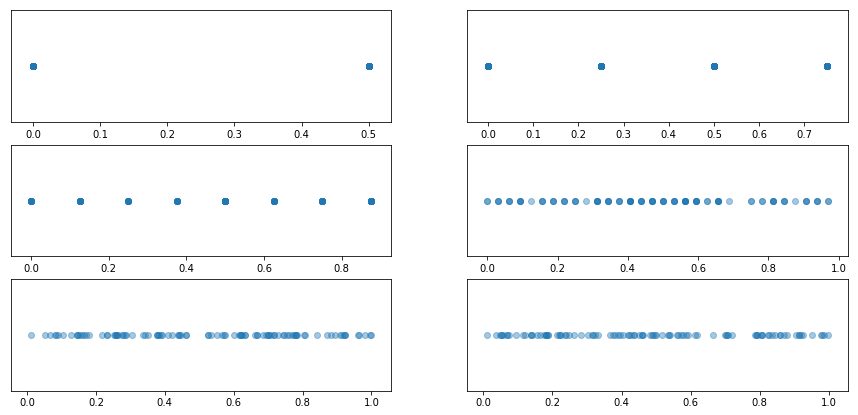

In [51]:
size = 100

plt.figure(figsize=(15, 7)) # увеличил размеры
for i, precision in enumerate([1, 2, 3, 5, 10, 30]):
    plt.subplot(3, 2, i + 1)
    plt.scatter(# <Сгенерируйте выборку размера size точности precision>,
                uniform(size, precision),
                np.zeros(size), alpha=0.4)
    plt.yticks([])
    # if i < 4: plt.xticks([]) закомментировал эту строку, так как без неё казалось, например, что на первом графике отмечены
    # только точки 0.0 и 1.0
plt.show()

**Вывод:**

При увеличении количества знаков после запятой (precision), распределение становится всё более похожим на равномерное.

*Часть 2.* Напишите функцию генерации выборки размера `size` (как и раньше, тут может быть `tuple`) из распределения $\mathcal{N}(loc, scale^2)$ с помощью преобразования Бокса-Мюллера (задача 7.12 из книги по теории вероятностей).

Для получения полного балла реализация должна быть без циклов.

In [11]:
def normal(size=1, loc=0, scale=1, precision=30):
    cos = np.cos(2 * np.pi * uniform(size, precision))
    sqrt= np.sqrt(-2 * np.log(uniform(size, precision)))
    return cos * sqrt * scale + loc

Для $\mathcal{N}(0, 1)$ сгенерируйте выборку и постройте график плотности этого распределения на отрезке $[-3, 3]$.

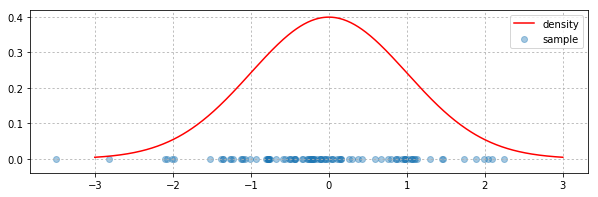

In [35]:
size = 100
grid = np.linspace(-3, 3, 500)

plt.figure(figsize=(10, 3))
plt.scatter(normal(size, 0, 1, precision),
            np.zeros(size), alpha=0.4, label='sample')

plt.plot(grid,
         sps.norm.pdf(grid),
         color='red', label='density')
plt.legend()
plt.grid(ls=':')
plt.show()

Пусть $P$ --- некоторое распределение на $(\mathbb{R}, \mathscr{B}(\mathbb{R}))$. Числа $a$ и $\sigma$ называются параметрами сдвига и масштаба соответственно для семейства распределений $\left\{P_{a,\sigma}\ \left|\ a \in \mathbb{R}, \sigma \in \mathbb{R}_+\right.\right\}$, где $P_{a,\sigma}(B) = P\left(\frac{B-a}{\sigma}\right)$ и $\frac{B-a}{\sigma} = \left\{\left. \frac{x-a}{\sigma}\ \right|\ x \in B \right\}$

**Вопрос:** Найдите плотность $P_{a,\sigma}$, если $P$ имеет плотность $p(x)$.

Из условия: $F_{a, \sigma} (x) = P_{a, \sigma}(-\infty;x] = P(-\infty; \frac{x - a}{\sigma}] = F(\frac{x - a}{\sigma})$
Откуда $p_{a, \sigma}(x) = \frac{1}{\sigma} * p(\frac{x - a}{\sigma})$

**Вопрос:** Пусть $P$ --- стандартное нормальное распределение. Выпишите параметрическое семейство распределений, параметризованное параметрами сдвига и масштаба по отношению к распределению $P$. Какая связь между параметрами и характеристиками распределения (например, математическое ожидание)?

<...>

Постройте на одном графике разными цветами плотности стандартного нормального распределения, а так же для параметров $a=3, \sigma=1$ и $a=0, \sigma=2$. Интеравл по оси икс $[-7, 7]$.

Ниже графика теми же цветами изобразите также точку $a$ и $3\sigma$-интервал, используя шаблон, приведенный ниже.

**Вывод:**

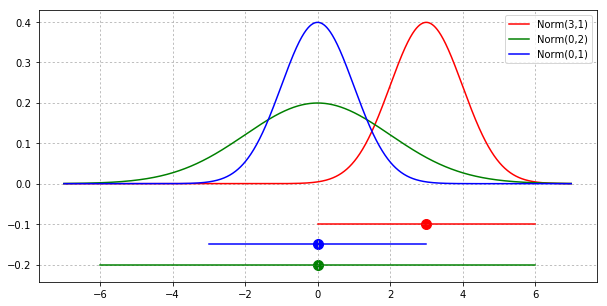

In [4]:
plt.figure(figsize=(10, 5))
grid = np.linspace(-7, 7, 2000)
plt.plot([3 - 3 * 1,3 + 3 * 1], [-0.1, -0.1], color='red')
plt.plot(grid, sps.norm(3, 1).pdf(grid), color='red', label='Norm(3,1)')
plt.scatter(3, -0.1, color='red', s=100)

plt.plot([0 - 3 * 2, 0 + 3 * 2], [-0.2, -0.2], color='green')
plt.plot(grid, sps.norm(0, 2).pdf(grid), color='green', label='Norm(0,2)')
plt.scatter(0, -0.2, color='green', s=100)

plt.plot([0 - 3 * 1,0 + 3 * 1], [-0.15, -0.15], color='blue')
plt.plot(grid, sps.norm(0, 1).pdf(grid), color='blue', label='Norm(0,1)')
plt.scatter(0, -0.15, color='blue', s=100)

plt.legend()
plt.grid(ls=':')

Как мы видим, почти вся плотность распределения лежит в интервале $(a - 3\sigma; a + 3\sigma)$. Как подсказывает Википедия, мы видим выполнение правила "Трёх сигм", согласно которому приблизительно с вероятностью 0,9973 значение нормально распределённой случайной величины лежит в указанном интервале.

*Часть 3.* Теперь напишите функцию генерации выборки из многомерного нормального распределения с заданным вектором средних `mean` и матрицей ковариаций `cov_matrix`. Помочь в этом может теорема об эквивалентных определениях гауссовского вектора. Для извлечения квадратного корня из матрицы может пригодится следующая функция, которая вычисляет собственные значения и векторы матрицы.

In [7]:
from scipy.linalg import eigh

На этот раз достаточно, чтобы функция корректно работала в случае, когда `size` является числом.

In [ ]:
def gauss(mean, cov_matrix, size=1, precision=30):
    # Преобразование типов
    mean = np.array(mean)
    cov_matrix = np.array(cov_matrix)
    
    # Проверка на корректность входа
    assert mean.ndim == 1 and cov_matrix.ndim == 2
    assert mean.shape[0] == cov_matrix.shape[0]
    assert cov_matrix.shape[0] == cov_matrix.shape[1]
    
    <...>

Сгенерируйте выборку размера `size` из двумерного нормального распределения с нулевым вектором средних и матрицей ковариаций $\begin{pmatrix}2 & 1 \\ 1 & 2\end{pmatrix}$.
Нанесите точки выборки на график и отметьте цветом значение плотности.

В инструкциях по Питону плотность вычислялась с помощью неэффективного кода. Подумайте, как можно написать эффективный короткий код, не использующий циклы.

In [ ]:
size = 1000
sample = <...>  # Генерация выборки

grid = np.mgrid[-4:4:0.05, -4:4:0.05]
density = sps.multivariate_normal.pdf(<...>)  # Вычисление плотности

plt.figure(figsize=(10, 10))
plt.pcolormesh(grid[0], grid[1], density, cmap='Oranges')
plt.scatter(sample[:, 0], sample[:, 1], alpha=0.4, label='sample')
plt.legend()
plt.grid(ls=':')
plt.xlim((-4, 4))
plt.ylim((-4, 4))
plt.show()

**Вывод:**

<...>

**Задача 2.** Вы уже научились генерировать выборку из равномерного распределения. Напишите функцию генерации выборки из экспоненциального распределения, используя результат задачи 6.9 из книги по теории вероятностей.

Для получения полного балла реализация должна быть без циклов, а параметр `size` может быть типа `tuple`.

In [44]:
def expon(size=1, lambd=1, precision=30):
    # $F^{-1}(x) = \frac{-1}{\lambda} * ln(1 - x)$
    return np.log(1 - uniform(size, precision)) / (-lambd)

Для $Exp(1)$ сгенерируйте выборку размера 100 и постройте график плотности этого распределения на отрезке $[-0.5, 5]$.

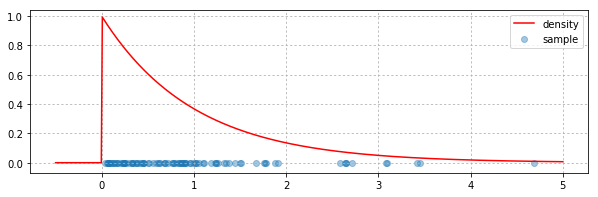

In [46]:
size = 100
grid = np.linspace(-0.5, 5, 500)
lambd = 1

plt.figure(figsize=(10, 3))
plt.scatter(expon(size, lambd,precision),
            np.zeros(size), alpha=0.4, label='sample')

plt.plot(grid,
         sps.expon.pdf(grid),
         color='red', label='density')
plt.legend()
plt.grid(ls=':')
plt.show()

**Вывод:**

Проверили на практике метод обратного преобразования, помогающий получить экспоненциальное распределение из равномерного.

**Задача 3.** Для каждого распределения постройте эмпирическую функцию распределения (ЭФР), гистограмму и ядерную оценку плотности. Сделать это помогут следующие функции.

In [8]:
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.nonparametric.kde import KDEUnivariate

*1. Бернуллиевское.*

Тут приведен пример построения ЭФР, просто запустите эту ячейку.

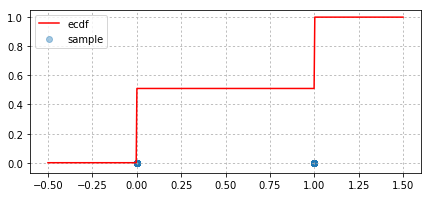

In [48]:
sample = coin(size=100)
ecdf = ECDF(sample)
grid = np.linspace(-0.5, 1.5, 500)

plt.figure(figsize=(7, 3))
plt.scatter(sample, np.zeros(size), alpha=0.4, label='sample')
plt.plot(grid, ecdf(grid), color='red', label='ecdf')
plt.legend()
plt.grid(ls=':')
plt.show()

Далее, чтобы не копировать несколько раз один и тот же код, напишем некоторую функцию.

В третьей функции нужно построить ядерную оценку плотности, о которой будет рассказано на лекциях. В частности, формула была на презентации на первой лекции. Пример построения можно посмотреть тут http://statsmodels.sourceforge.net/0.6.0/generated/statsmodels.nonparametric.kde.KDEUnivariate.html

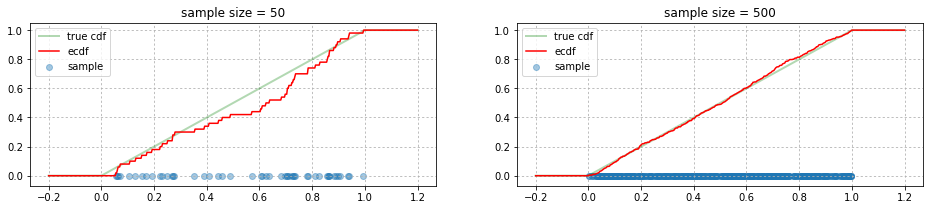

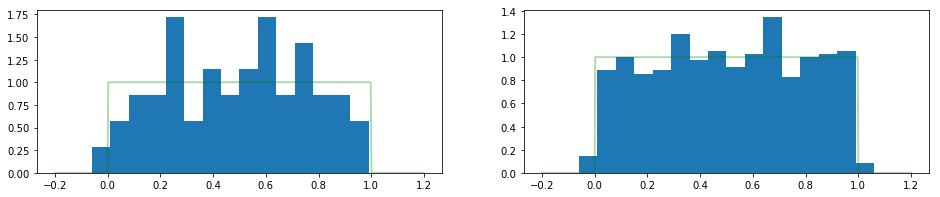

C:\Users\Maxim\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


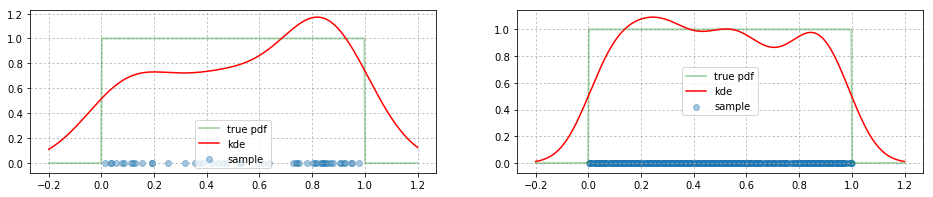

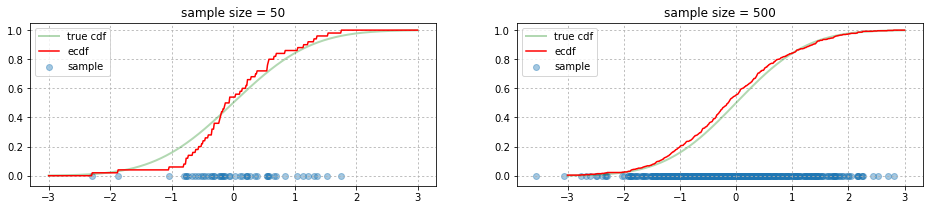

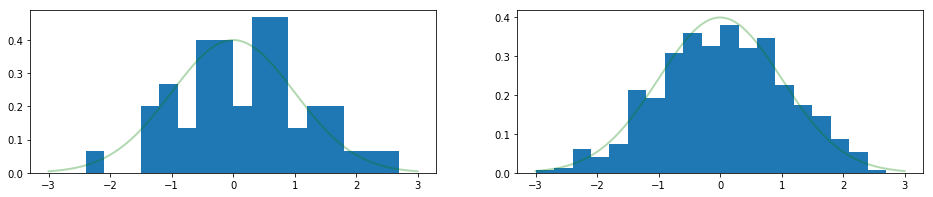

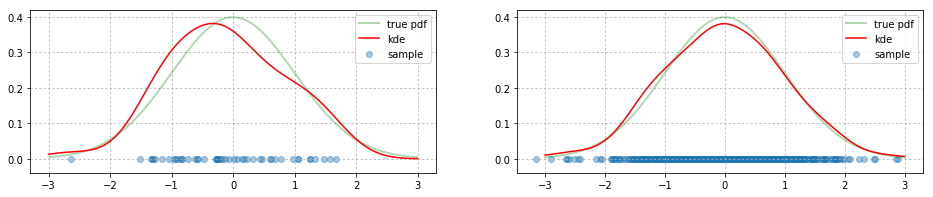

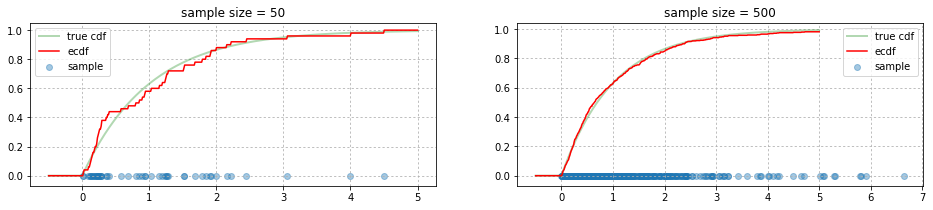

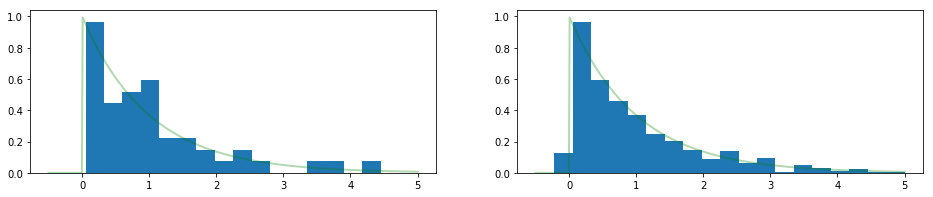

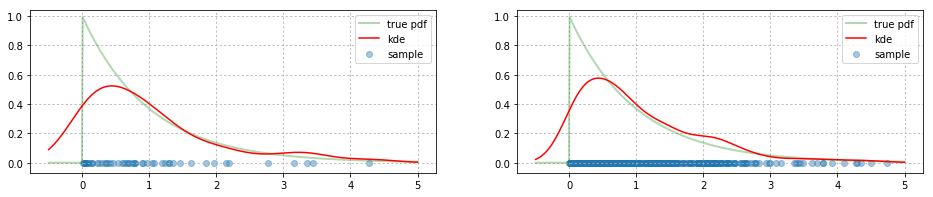

In [57]:
def draw_ecdf(sample, grid, cdf=None):
    ''' По сетке grid cтроит графики эмпирической функции распределения 
    и истинной (если она задана) для всей выборки и для 1/10 ее части.
    '''
    
    plt.figure(figsize=(16, 3))
    for i, size in enumerate([len(sample) // 10, len(sample)]):
        plt.subplot(1, 2, i + 1)
        
        plt.scatter(# <Первые size точек из sample с нулевой y-координатой>, 
                    sample[0:size], y = np.zeros_like(sample[0:size]),
                    alpha=0.4, label='sample')
        
        if cdf is not None:
            plt.plot(grid, 
                     #<Значения функции распределения в точках grid>, 
                     cdf(grid),
                     color='green', alpha=0.3, lw=2, label='true cdf')
        
        plt.plot(grid, 
                 #<Значения эмпирической функции распределения 
                 #(по первым size точек из sample) в точках grid>, 
                 ECDF(sample[0:size])(grid),
                 color='red', label='ecdf')
        
        plt.legend()
        plt.grid(ls=':')
        plt.title('sample size = {}'.format(size))
    plt.show()

    
def draw_hist(sample, grid, pdf=None):
    ''' Строит гистограмму и по сетке grid график истинной плотности 
    (если она задана) для всей выборки и для 1/10 ее части.
    '''
    
    plt.figure(figsize=(16, 3))
    for i, size in enumerate([len(sample) // 10, len(sample)]):
        plt.subplot(1, 2, i + 1)
        plt.hist(#<Постройте гистограмму по первым size точек из sample>, 
                 #<Установите 20 ячеек>,
                 sample[0:size], bins = 20,
                 range=(grid.min(), grid.max()), 
                 normed=True)
        
        if pdf is not None:
            plt.plot(grid, 
                     #<Значения плотности в точках grid>, 
                     pdf(grid),
                     color='green', alpha=0.3, lw=2)
    plt.show()
    

def draw_pdf(sample, grid, pdf=None):
    ''' По сетке grid cтроит графики ядерной оценки плотности 
    и истинной плотности (если она задана) для всей выборки и для 1/10 ее части.
    '''
        
    plt.figure(figsize=(16, 3))
    for i, size in enumerate([len(sample) // 10, len(sample)]):
        plt.subplot(1, 2, i + 1)
        kernel_density = KDEUnivariate(sample[:size])
        kernel_density.fit()
        
        plt.scatter(#<Первые size точек из sample с нулевой y-координатой>, 
                    sample[0:size], np.zeros_like(sample[0:size]),
                    alpha=0.4, label='sample')
        
        if pdf is not None:
            plt.plot(grid,
                     #<Значения плотности в точках grid>,
                     pdf(grid),
                     color='green', alpha=0.3, lw=2, label='true pdf')
        
        plt.plot(grid,
                 #<Значение ядерной оценки плотности (по первым size точек из sample) 
                 #в точках grid (используйте evaluate)>,
                 kernel_density.evaluate(grid),
                 color='red', label='kde')
        
        plt.legend()
        plt.grid(ls=':')
    plt.show()
    
# Uniform
a = -0.2
b = 1.2
frequency = 500
draw_ecdf(uniform(500), np.linspace(a, b, frequency), sps.uniform.cdf)
draw_hist(uniform(500), np.linspace(a, b, frequency), sps.uniform.pdf)
draw_pdf(uniform(500), np.linspace(a, b, frequency), sps.uniform.pdf)

# Normal
a = -3
b = 3
draw_ecdf(normal(500), np.linspace(a, b, frequency), sps.norm.cdf)
draw_hist(normal(500), np.linspace(a, b, frequency), sps.norm.pdf)
draw_pdf(normal(500), np.linspace(a, b, frequency), sps.norm.pdf)

# Exponential
a = -0.5
b = 5
draw_ecdf(expon(500), np.linspace(a, b, frequency), sps.expon.cdf)
draw_hist(expon(500), np.linspace(a, b, frequency), sps.expon.pdf)
draw_pdf(expon(500), np.linspace(a, b, frequency), sps.expon.pdf)

При использовании KDEUnivariate могут возникать разные проблемы. Можно попробовать их решить следующими способами:

**1.** В режиме суперюзера в файле `/usr/local/lib/python3.5/dist-packages/statsmodels/nonparametric/kdetools.py` замените строку 20 на

`y = X[:int(m/2+1)] + np.r_[0,X[int(m/2+1):],0]*1j`

В файле `/usr/local/lib/python3.5/dist-packages/statsmodels/nonparametric/kde.py` замените строку 327 на

`nobs = len(X) # after trim`

**2.** Попробуйте скачать с гитхаба https://github.com/statsmodels/statsmodels/, установить руками. При этом должен быть установлен cython.

Можно также воспользоваться другой реализацией http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KernelDensity.html#sklearn.neighbors.KernelDensity

-------

Теперь примените реализованные выше функции к выборкам размера 500 из распределений $U[0, 1]$, $\mathcal{N}(0, 1)$ и $Exp(1)$. Графики (ф.р., плотностей) стройте на интервалах $(-0.2, 1.2)$, $(-3, 3)$ и $(-0.5, 5)$ соответственно.

**Вывод:**

Как видим из графиков, эмпирическая функция распределения и ядерная оценка плотности довольно хорошо приближают истинную функцию распределения и плотность соответственно. Особенно при большом объёме выборки.

**Задача 4.** Сгенерируйте выборку $X_1, ..., X_{10000}$ из стандартного нормального распределения. Для каждого $n \leqslant 10000$ постройте эмпирическую функцию распределения $F^*_n$ и посчитайте **точное** значение статистики $$D_n = \sup\limits_{x \in \mathbb{R}} \left| F_n^*(x) - F(x) \right|.$$
Постройте график зависимости статистики $D_n$ от $n$. Верно ли, что $D_n \to 0$ и в каком смысле? Не забудьте сделать вывод.

По теореме Гливенко-Кантелли $D_n$ сходится к нулю почти наверное

**Задача 5.** Исследуйте вид ядерной оценки плотности в зависимости от вида ядра и его ширины.

Для этого сгенерируйте выборку $X_1, ..., X_{200}$ из распределения $U[0, 1]$ и постройте серию графиков для различной ширины гауссовского ядра, а затем другую серию графиков для различных типов ядер при фиксированной ширине. На каждом графике на отрезке $[-0.2, 1.2]$ должны быть изображены истинная плотность (полупрозрачным цветом) и ее ядерная оценка, а так же с нулевой $y$-координатой должны быть нанесены точки выборки. Для экономии места стройте графики в два столбца.

 Не забудьте сделать вывод.

**Задача 6.** В файле `countries.csv` дан список стран и территорий с указанием их площади. Нанести значения площади на график и постройте эмпирическую функцию распределения и ядерную оценку плотности. Поскольку некоторые страны слишком большие, ограничьте график по оси икс.  Не забудьте сделать вывод.

**Задача 7.** Проведите небольшое исследование. Выберите случайных $n$ человек в социальной сети. Вы можете выбирать их случайно из всех зарегистрированных в этой социальной сети, либо по какому-то *одному* критерию (укажите его). Составьте выборку $X_1, ..., X_n$, где $X_i$ --- количество друзей у $i$-го человека. Постройте по этой выборке эмпирическую функцию распределения. Можете ли вы сказать, какому закону подчиняется распределение количества друзей?



Выборка должна быть из не менее 30 человек, ограничений сверху нет. Вы можете также написать программу, которая будет автоматически собирать данные.  Не забудьте сделать вывод.

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 len =  100


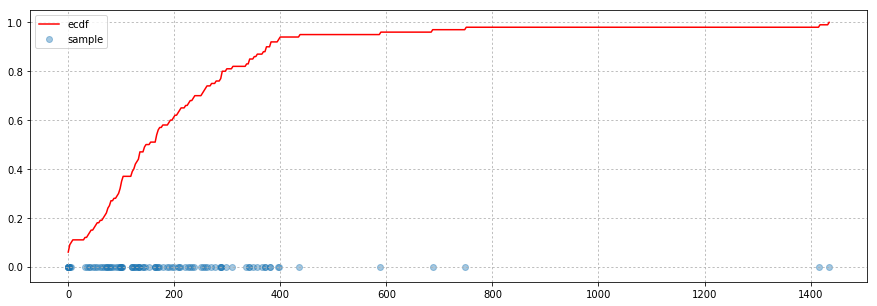

In [47]:
import vk

session = vk.Session()
api = vk.API(session)

size = 100
sample = []

curID = 100500
#pavelDurov = api.users.get(user_ids = 1)
#print(pavelDurov[0]['first_name'])
names = ["Максим", "Maxim", "Кирилл", "Kirill", "Сергей", "Sergey", "Лидия", "Lydia", "Светлана", "Svetlana", "Павел", "Pavel",
        "Александр", "Alexander", "Алексей", "Alexey", "Дмитрий", "Dmitry", "Иван", "Ivan", "Михаил", "Mikhail", "Юлия", "Julia",
        "Дарья", "Darya", "Маргарита", "Margarita", "Илья", "Ilya", "Вардан", "Vardan", "Арсений", "Arseniy", "Екатерина",
        "Ekaterina", "Ольга", "Olga", "Елена", "Elena", "Лена", "Lena", "Даша", "Dasha", "Оля", "Olya"]
# names2 = ["Максим", "Maxim", "Max", "Железный кулак", "Стильный чувак", "Макс"]
while len(sample) < size:
    curID += 1
    user = api.users.get(user_ids = curID)
    if not user[0].__contains__('hidden') and not user[0].__contains__('deactivated') and user[0]['first_name'] in names: 
        sample.append(len(api.friends.get(user_id = user[0]['uid'])))
        print(len(sample), end=' ')
sample = np.array(sample)
print("len = ", len(sample))
max_friends = sample.max()
min_friends = sample.min()

# Строим ЭФР по выборке.
ecdf = ECDF(sample)
grid = np.linspace(min_friends, max_friends, 500)

plt.figure(figsize=(15, 5))
plt.scatter(sample, np.zeros_like(sample), alpha=0.4, label='sample')
plt.plot(grid, ecdf(grid), color='red', label='ecdf')
plt.legend()
plt.grid(ls=':')
plt.show()

Я посчитал количество друзей у людей, которые имеют одно из имён из списка names. Распределение очень похоже на экспоненциальное,и это можно объяснить: видно, что из 100 человек, всего 6 имеют более 400 друзей, из них более 800 имеют всего лишь двое(что логично). То есть почти все люди имеют сравнительно небольшое количество "друзей" вк. Причём из-за того, что большая часть имеет от 30 до 200 друзей(что тоже естественно), график распределения ведёт себя не как равномерное распределение, а немного "выгибается" подобно экспоненциальному.